**Dataset: Kaggle - Vehicle dataset**
- Regression
- Francisco P. Guimarães

In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

In [2]:
#Carregando Dataset
cars = pd.read_csv("archive\Car details v3.csv", sep=",")

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\FPGUIMAR\AppData\Local\Temp\ipykernel_18028\1113686634.py:2: SyntaxWarning: invalid escape sequence '\C'
  cars = pd.read_csv("archive\Car details v3.csv", sep=",")


In [3]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [43]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [44]:
cars.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [45]:
labelencoder = LabelEncoder()
cars['fuel'] = labelencoder.fit_transform(cars['fuel'])
cars['seller_type'] = labelencoder.fit_transform(cars['seller_type'])
cars['transmission'] = labelencoder.fit_transform(cars['transmission'])
cars['owner'] = labelencoder.fit_transform(cars['owner'])
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [46]:
cars = cars.drop("torque", axis=1)

In [47]:
import re
def extract_value(text):
    match = re.search(r'(\d+)', str(text))
    if match:
        return int(match.group(1))
    return None

In [48]:
cars['engine'] = cars['engine'].apply(extract_value)
cars['mileage'] = cars['mileage'].apply(extract_value)
cars['max_power'] = cars['max_power'].apply(extract_value)
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.0,1248.0,74.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.0,1498.0,103.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,4,17.0,1497.0,78.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.0,1396.0,90.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.0,1298.0,88.0,5.0


In [49]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   int64  
 5   seller_type    8128 non-null   int64  
 6   transmission   8128 non-null   int64  
 7   owner          8128 non-null   int64  
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 762.1+ KB


In [54]:
cars = cars.drop("name", axis=1)

In [56]:
correlation_matrix = cars.corr()

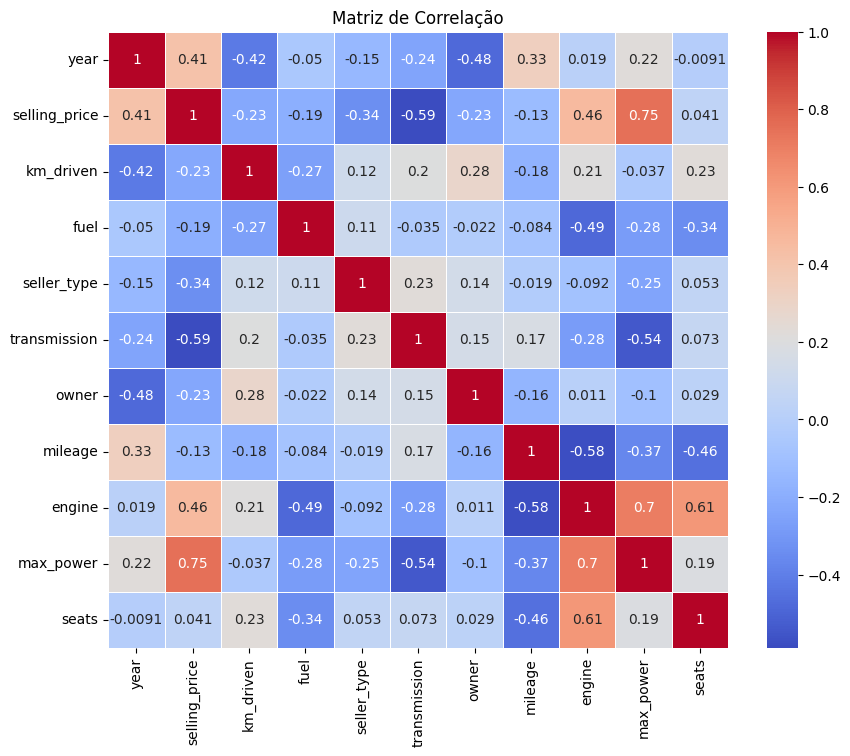

In [57]:

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [58]:
cars.columns


Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

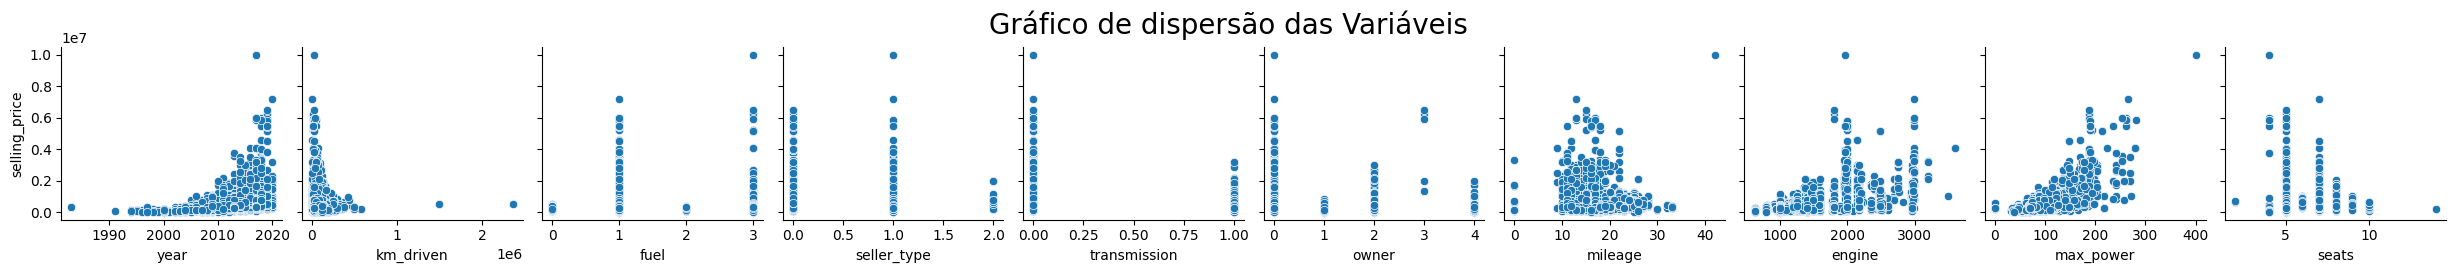

In [60]:
plt.figure(figsize=(10,8))
ax = sns.pairplot(cars, y_vars="selling_price", x_vars= ['year','km_driven','fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])
ax.figure.suptitle('Gráfico de dispersão das Variáveis', fontsize=20, y=1.05)
plt.show()

In [61]:
cars_notnull = cars.dropna(axis=0)
cars_notnull

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,1,0,23.0,1248.0,74.0,5.0
1,2014,370000,120000,1,1,1,2,21.0,1498.0,103.0,5.0
2,2006,158000,140000,3,1,1,4,17.0,1497.0,78.0,5.0
3,2010,225000,127000,1,1,1,0,23.0,1396.0,90.0,5.0
4,2007,130000,120000,3,1,1,0,16.0,1298.0,88.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,3,1,1,0,18.0,1197.0,82.0,5.0
8124,2007,135000,119000,1,1,1,1,16.0,1493.0,110.0,5.0
8125,2009,382000,120000,1,1,1,0,19.0,1248.0,73.0,5.0
8126,2013,290000,25000,1,1,1,0,23.0,1396.0,70.0,5.0


<Figure size 1000x800 with 0 Axes>

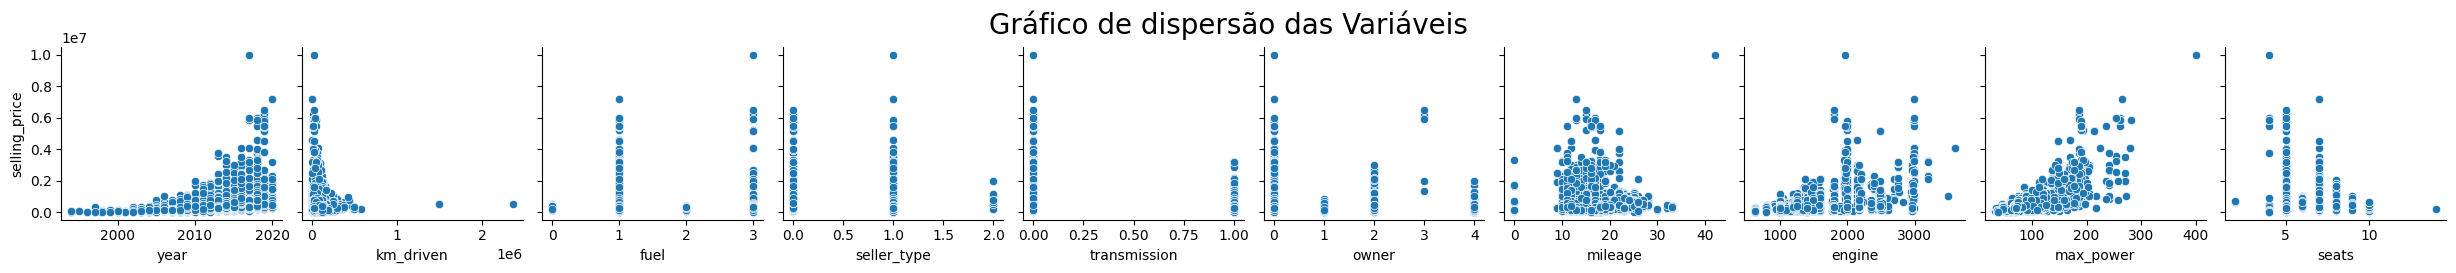

In [62]:
plt.figure(figsize=(10,8))
ax = sns.pairplot(cars_notnull, y_vars="selling_price", x_vars= ['year','km_driven','fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])
ax.figure.suptitle('Gráfico de dispersão das Variáveis', fontsize=20, y=1.05)
plt.show()

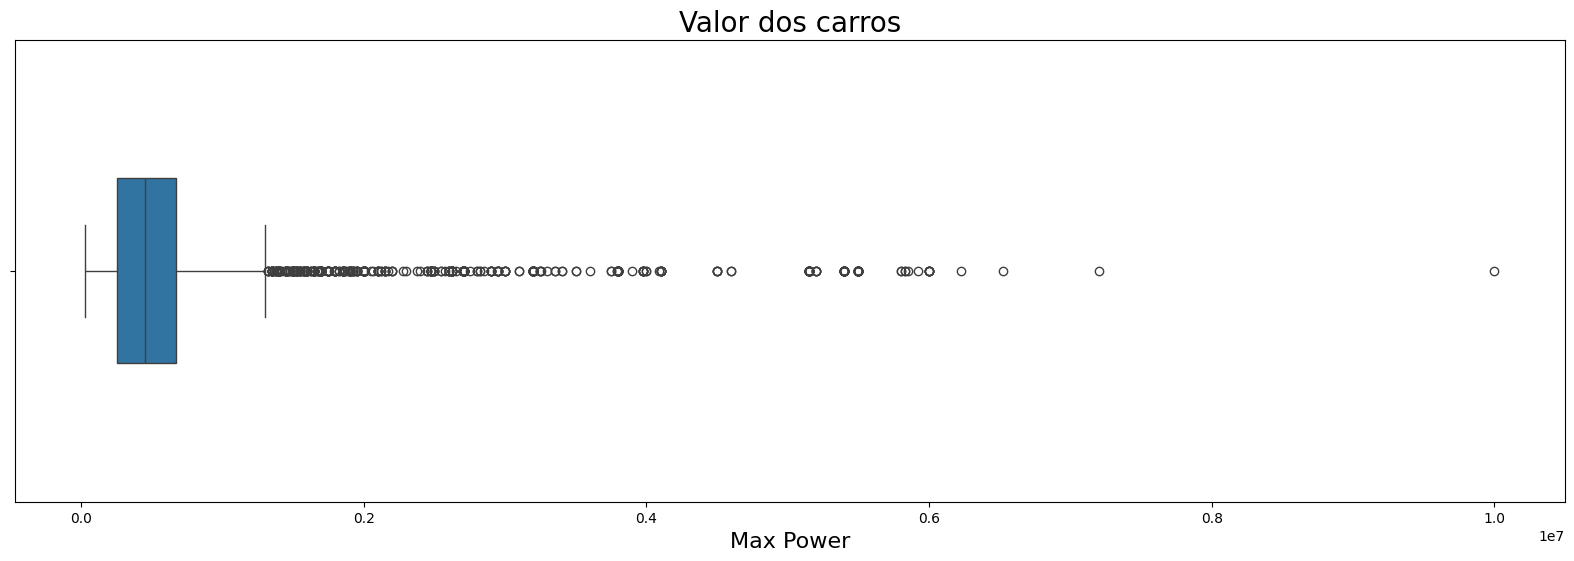

In [125]:
ax = sns.boxplot(cars, x ="selling_price", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor dos carros', fontsize=20)
ax.set_xlabel('Max Power', fontsize=16)
plt.show()

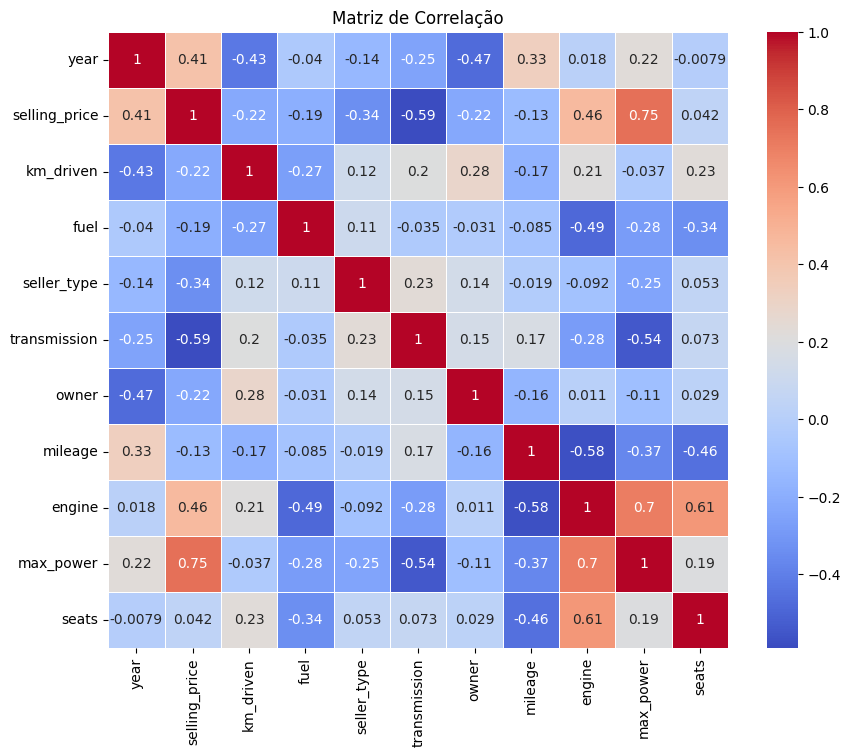

In [63]:
correlation_matrix_nn = cars_notnull.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_nn, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

In [64]:
cars_notnull = cars_notnull.drop("seats", axis=1)

In [69]:
cars_notnull['log_selling_price'] = np.log(cars_notnull['selling_price'])
cars_notnull['log_km_driven'] = np.log(cars_notnull['km_driven'])
cars_notnull['log_mileage'] = np.log1p(cars_notnull['mileage'])
cars_notnull['log_engine'] = np.log(cars_notnull['engine'])
cars_notnull['log_max_power'] = np.log(cars_notnull['max_power'])

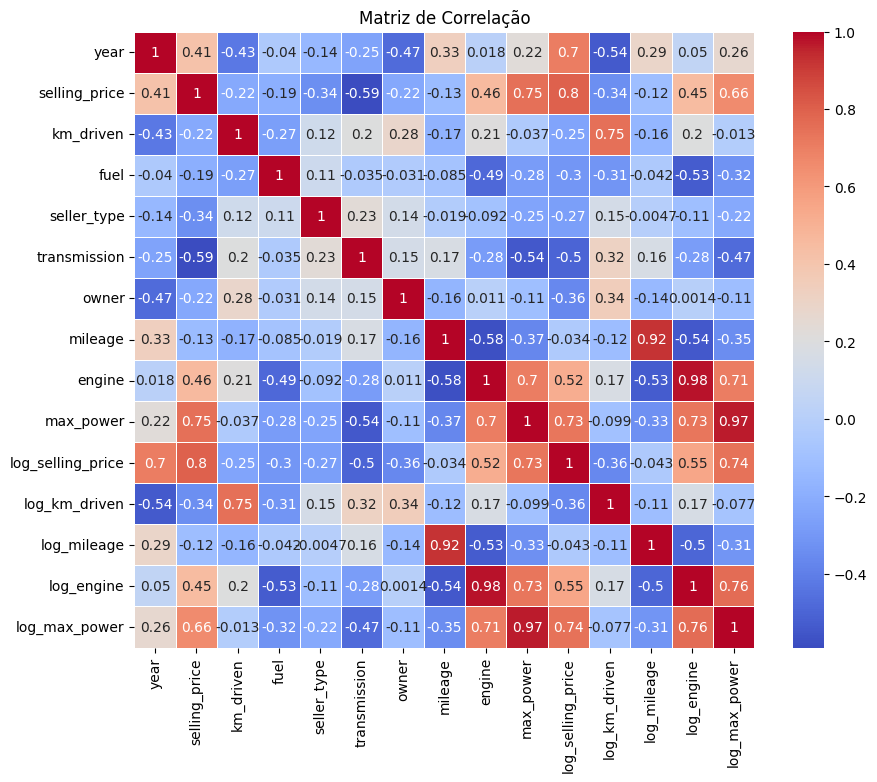

In [70]:
correlation_matrix_nn = cars_notnull.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix_nn, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

<Figure size 1000x800 with 0 Axes>

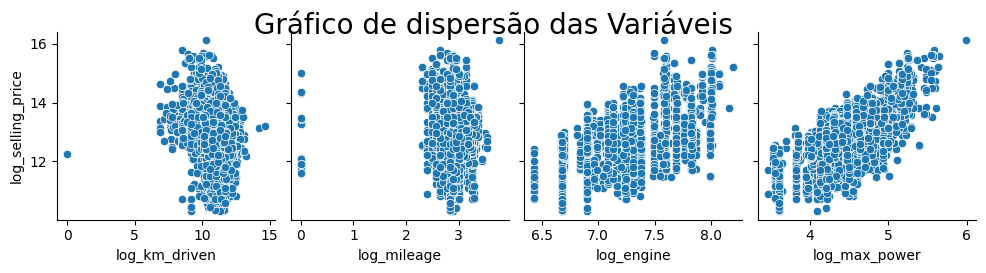

In [73]:
plt.figure(figsize=(10,8))
ax = sns.pairplot(cars_notnull, y_vars="log_selling_price", x_vars= ['log_km_driven','log_mileage','log_engine', 'log_max_power'])
ax.figure.suptitle('Gráfico de dispersão das Variáveis', fontsize=20, y=1.05)
plt.show()

*Treinamento*

In [74]:
cars_notnull.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power',
       'log_selling_price', 'log_km_driven', 'log_mileage', 'log_engine',
       'log_max_power'],
      dtype='object')

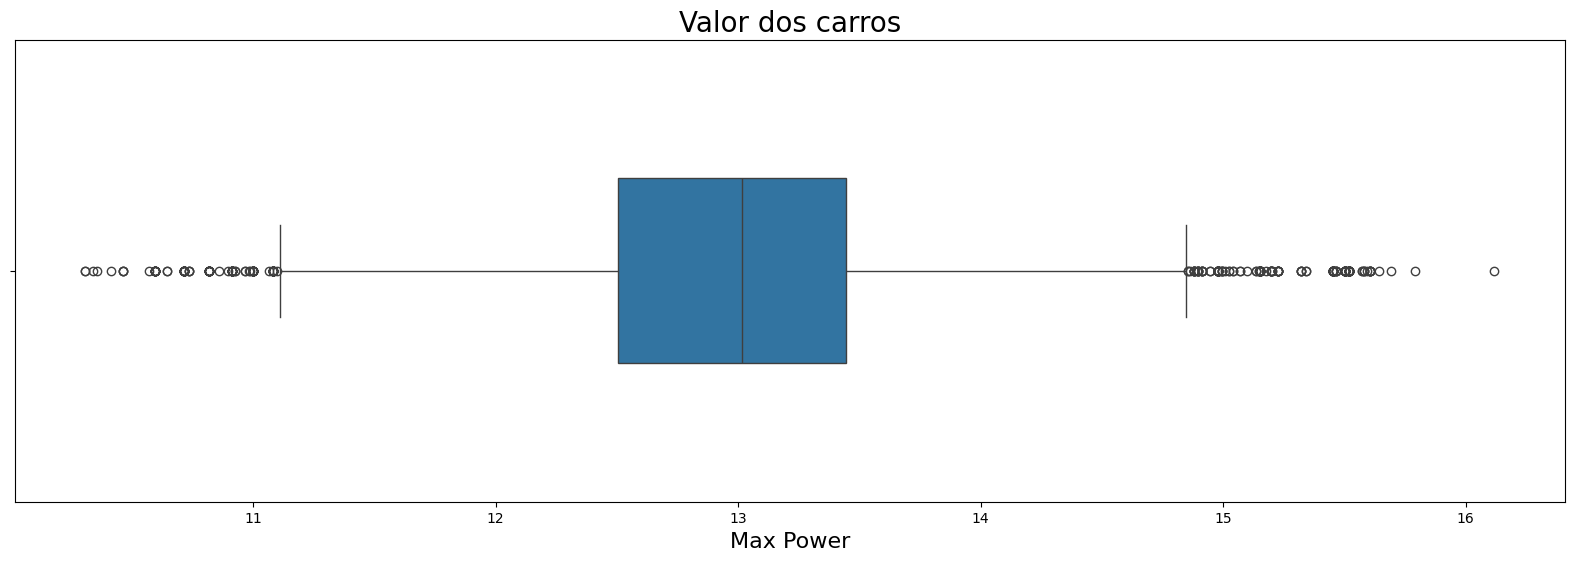

In [127]:
ax = sns.boxplot(cars_notnull, x ="log_selling_price", width=0.4)

ax.figure.set_size_inches(20, 6)
ax.set_title('Valor dos carros', fontsize=20)
ax.set_xlabel('Max Power', fontsize=16)
plt.show()

In [97]:
from sklearn.model_selection import train_test_split

X = cars_notnull[['year', 'fuel', 'seller_type',
       'transmission', 'owner', 'log_km_driven', 'log_mileage', 'log_engine',
       'log_max_power']]
y = cars_notnull['log_selling_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

In [99]:
LinearR_model = LinearRegression()

LinearR_model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = LinearR_model.predict(X_test)

In [102]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.8521532193147476

In [103]:
cars_notnull.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,log_selling_price,log_km_driven,log_mileage,log_engine,log_max_power
0,2014,450000,145500,1,1,1,0,23.0,1248.0,74.0,13.017003,11.887931,3.178054,7.129298,4.304065
1,2014,370000,120000,1,1,1,2,21.0,1498.0,103.0,12.821258,11.695247,3.091042,7.311886,4.634729
2,2006,158000,140000,3,1,1,4,17.0,1497.0,78.0,11.970350,11.849398,2.890372,7.311218,4.356709
3,2010,225000,127000,1,1,1,0,23.0,1396.0,90.0,12.323856,11.751942,3.178054,7.241366,4.499810
4,2007,130000,120000,3,1,1,0,16.0,1298.0,88.0,11.775290,11.695247,2.833213,7.168580,4.477337


In [105]:
nova_entrada = [[2014, 1, 1, 1, 0, 11.887931, 3.178054, 7.129298, 4.304065]]

previsao = LinearR_model.predict(nova_entrada)

print(f'Previsão de log(preço de venda): {previsao[0]}')
# Para converter de volta ao espaço original:
preco_venda = np.exp(previsao)
print(f'Preço de venda estimado: {preco_venda[0]}')

Previsão de log(preço de venda): 12.829988734245859
Preço de venda estimado: 373244.4083255655


c:\Users\FPGUIMAR\Documents\dataScience\JupyterConfig\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


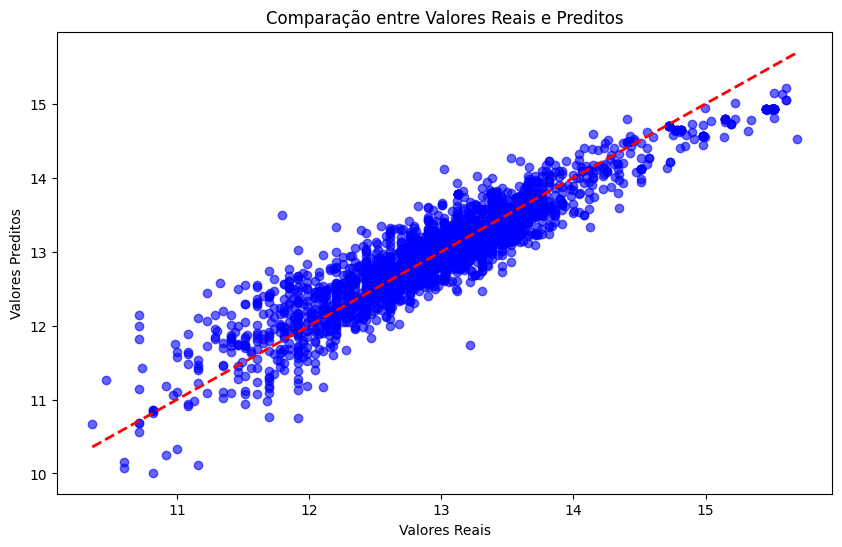

In [106]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [108]:
randomForest_model = RandomForestRegressor()

In [109]:
randomForest_model.fit(X_train, y_train)

RandomForestRegressor()

In [110]:
y_pred = randomForest_model.predict(X_test)

In [112]:
r2 = r2_score(y_test, y_pred)
r2

0.933284209039747

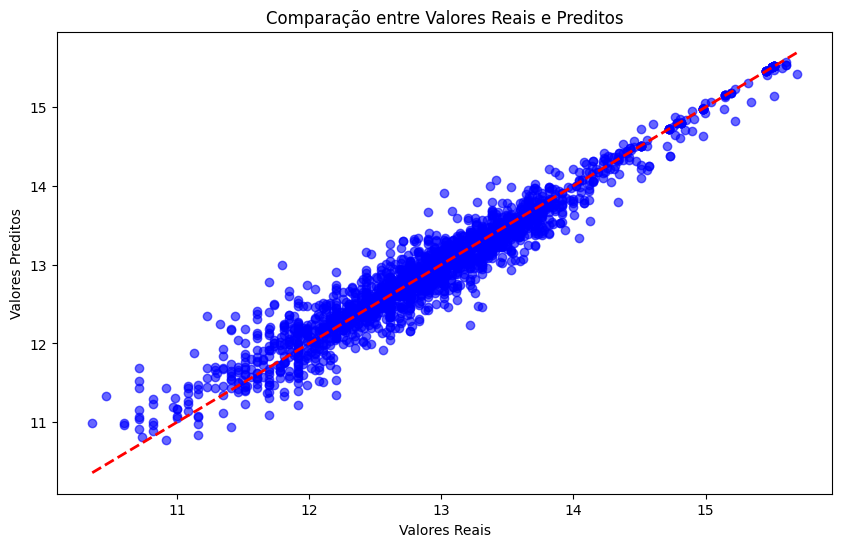

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

In [129]:
nova_entrada = [[2014, 1, 1, 1, 0, 11.887931, 3.178054, 7.129298, 4.304065]]

previsao = randomForest_model.predict(nova_entrada)

print(f'Previsão de log(preço de venda): {previsao[0]}')
# Para converter de volta ao espaço original:
preco_venda = np.exp(previsao)
print(f'Preço de venda estimado: {preco_venda[0]}')

Previsão de log(preço de venda): 13.028898702222582
Preço de venda estimado: 455385.0948246884


c:\Users\FPGUIMAR\Documents\dataScience\JupyterConfig\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
gradientBoosting_model = GradientBoostingRegressor()

In [117]:
gradientBoosting_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [118]:
y_pred = gradientBoosting_model.predict(X_test)

In [119]:
r2 = r2_score(y_test, y_pred)
r2

0.9174192264968819

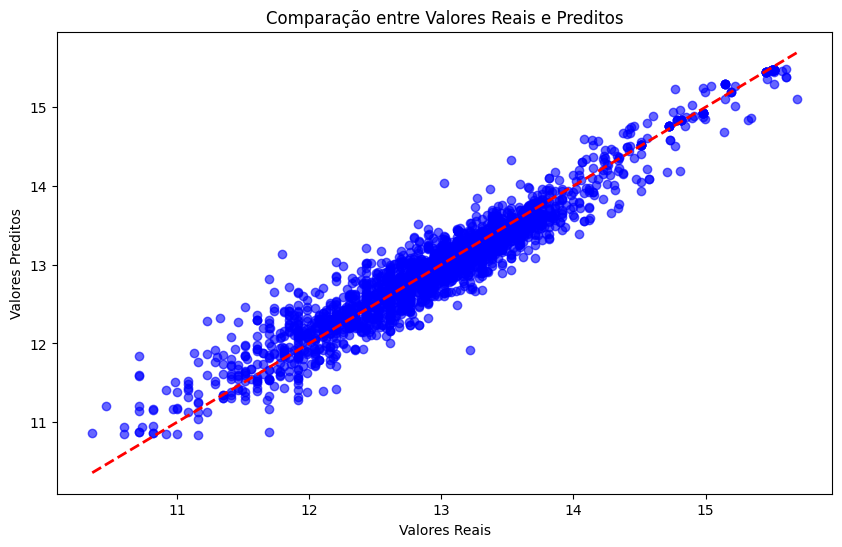

In [120]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação entre Valores Reais e Preditos')
plt.show()

In [128]:
nova_entrada = [[2014, 1, 1, 1, 0, 11.887931, 3.178054, 7.129298, 4.304065]]

previsao = gradientBoosting_model.predict(nova_entrada)

print(f'Previsão de log(preço de venda): {previsao[0]}')
# Para converter de volta ao espaço original:
preco_venda = np.exp(previsao)
print(f'Preço de venda estimado: {preco_venda[0]}')

Previsão de log(preço de venda): 12.942088259002597
Preço de venda estimado: 417520.2224068267


c:\Users\FPGUIMAR\Documents\dataScience\JupyterConfig\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
